In [8]:
# file: notebook/T9_2_tanimoto_similarity.ipynb
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import warnings
warnings.simplefilter("ignore", UserWarning)

# Load dataset
base_path = ".."
file_path = os.path.join(base_path, "data", "T9_chembl_smiles.csv")
df = pd.read_csv(file_path)

# Reference SMILES (Example: Aspirin)
query_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
query_mol = Chem.MolFromSmiles(query_smiles)
query_fp = AllChem.GetMorganFingerprintAsBitVect(query_mol, 2, nBits=2048)

# Compute Tanimoto similarity
def compute_similarity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    return DataStructs.TanimotoSimilarity(query_fp, fp)

df["tanimoto"] = df["canonical_smiles"].apply(compute_similarity)
df = df.dropna(subset=["tanimoto"])
df = df.sort_values(by="tanimoto", ascending=False)

# Save top 20 similar molecules
output_path = os.path.join(base_path, "data", "T9_tanimoto_top20.csv")
df.head(20).to_csv(output_path, index=False)
df

[19:36:15] DEPRECATION WARNING: please use MorganGenerator


KeyError: 'canonical_smiles'

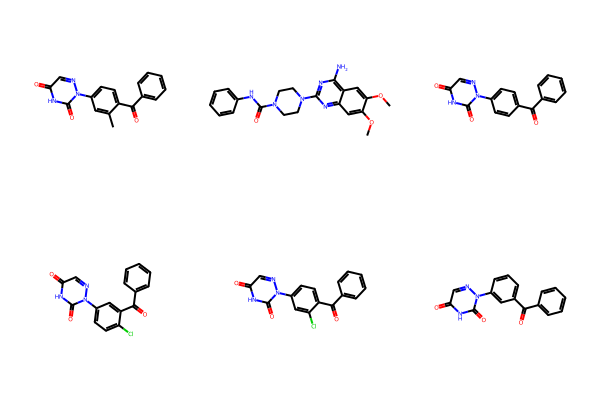

In [5]:
# T9_2_tanimoto_similarity.ipynb
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit import DataStructs
import warnings

# 🛑 Disable UserWarnings
warnings.simplefilter("ignore", UserWarning)

# 📂 Load data
base_path = ".."
input_path = os.path.join(base_path, "data", "T9_chembl_smiles.csv")
df = pd.read_csv(input_path)

# 🔬 Reference molecule (e.g. Aspirin)
query_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
query_mol = Chem.MolFromSmiles(query_smiles)

# 🧬 Initialize Morgan fingerprint generator
morgan_gen = GetMorganGenerator(radius=2, fpSize=2048)
query_fp = morgan_gen.GetFingerprint(query_mol)

# 🔁 Compute Tanimoto similarity
def compute_tanimoto(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = morgan_gen.GetFingerprint(mol)
    return DataStructs.TanimotoSimilarity(query_fp, fp)

df["tanimoto"] = df["canonical_smiles"].apply(compute_tanimoto)
df = df.dropna(subset=["tanimoto"])
df = df.sort_values(by="tanimoto", ascending=False)

# 💾 Save top 20
top_path = os.path.join(base_path, "data", "T9_tanimoto_top20.csv")
df.head(20).to_csv(top_path, index=False)

# 🖼️ Visualize top 6
top_mols = [Chem.MolFromSmiles(smi) for smi in df.head(6)["canonical_smiles"]]
Draw.MolsToGridImage(top_mols, molsPerRow=3, subImgSize=(200, 200))